# <center style='color:dodgerblue'>`K-Nearest Neighbors (KNN)` using Scikit-Learn</center>

## 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## 2. Load `wheat_seed` dataset

In [2]:
df = pd.read_csv('wheat_seed.csv', sep='\t')
df.head()

,Area,Environment,Compactness,Length_of_the_nucleus,Width_of_the_core,Coefficient_of_asymmetry,Length_of_the_core_groove,Class,Class_names
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [3]:
df.shape

(210, 9)

In [4]:
df.Class.unique(), df.Class_names.unique()

(array([1, 2, 3]), array(['Kama', 'Rosa', 'Canadian'], dtype=object))

## 3. Visualize selected features

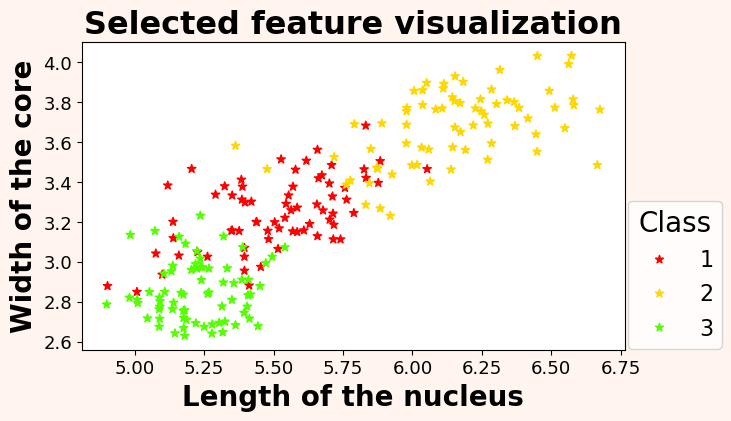

In [5]:
plt.figure(figsize=(7, 4), facecolor='seashell')
sc = plt.scatter(df.Length_of_the_nucleus, df.Width_of_the_core, s=40, c=df.Class, marker='*', cmap='prism')
plt.xlabel('Length of the nucleus', fontsize=20, fontweight='bold')
plt.ylabel('Width of the core', fontsize=20, fontweight='bold')
plt.title('Selected feature visualization', fontsize=23, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(*sc.legend_elements(), title='Class', fontsize=16, title_fontsize=20, bbox_to_anchor=(1.20, 0.52));

## 4. Separate features and labels

In [6]:
X = df.iloc[:, :-2]
y = df.loc[:, 'Class']

## 5. Perform preprocessing

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 6. Split the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, train_size=0.7, random_state=1)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(147, 63, 147, 63)

## 7. Apply `KNN`

In [10]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [11]:
print(f'Accuracy on the test set: {knn.score(X_test, y_test)}')

Accuracy on the test set: 0.9523809523809523


## 8. Plot `confusion_matrix`

In [12]:
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

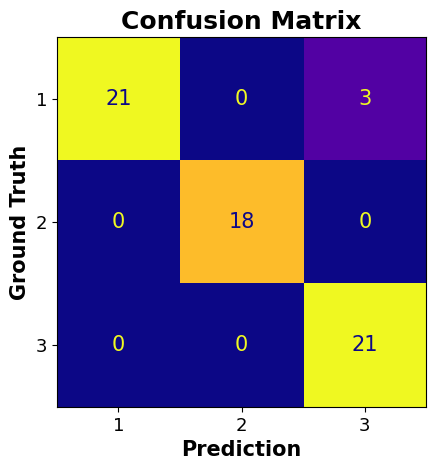

In [13]:
disp.plot(cmap='plasma', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [14]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


## 9. Print `classification_report`

In [15]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        24
           2       1.00      1.00      1.00        18
           3       0.88      1.00      0.93        21

    accuracy                           0.95        63
   macro avg       0.96      0.96      0.96        63
weighted avg       0.96      0.95      0.95        63



## 10. Scores for different `K`

In [16]:
scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

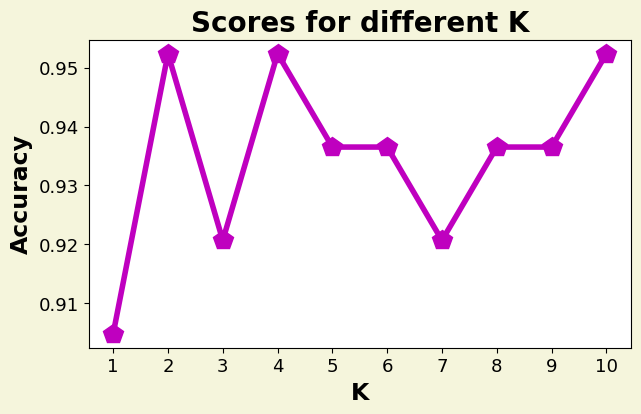

In [17]:
nk = np.arange(10) + 1

plt.figure(figsize=(7, 4), facecolor='beige')

plt.plot(nk, scores, color='m', marker='p', markersize=15, linewidth=4)
plt.xlabel('K', fontsize=17, fontweight='bold')
plt.ylabel('Accuracy', fontsize=17, fontweight='bold')
plt.title('Scores for different K', fontsize=20, fontweight='bold')
plt.xticks(nk, fontsize=13)
plt.yticks(fontsize=13);

In [18]:
scores

[0.9047619047619048,
 0.9523809523809523,
 0.9206349206349206,
 0.9523809523809523,
 0.9365079365079365,
 0.9365079365079365,
 0.9206349206349206,
 0.9365079365079365,
 0.9365079365079365,
 0.9523809523809523]

In [19]:
scores[1] == scores[3] == scores[9]

True

# Hence, `K=2` is a better option.